In [1]:
from ome_zarr.io import parse_url

In [2]:
import zarr
from matplotlib import pyplot as plt
from faim_ipa.UIntHistogram import UIntHistogram
from os.path import join

In [3]:
storage = parse_url(path="./zarr-files/MIP-2P-2sub.zarr/", mode="w").store

In [4]:
plate = zarr.group(store=storage)

In [5]:
plate.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.FSStore
No. members,1
No. arrays,0
No. groups,1
Groups,C


In [6]:
plate.store.dir_path()

'/home/tibuch/Gitrepos/faim-hcs/examples/zarr-files/MIP-2P-2sub.zarr/'

In [7]:
plate_attrs = plate.attrs.asdict()

In [8]:
plate_attrs

{'barcode': 'example-barcode',
 'order_name': 'example-order',
 'plate': {'columns': [{'name': '1'},
   {'name': '2'},
   {'name': '3'},
   {'name': '4'},
   {'name': '5'},
   {'name': '6'},
   {'name': '7'},
   {'name': '8'},
   {'name': '9'},
   {'name': '10'},
   {'name': '11'},
   {'name': '12'}],
  'field_count': 1,
  'name': 'MIP-2P-2sub',
  'rows': [{'name': 'A'},
   {'name': 'B'},
   {'name': 'C'},
   {'name': 'D'},
   {'name': 'E'},
   {'name': 'F'},
   {'name': 'G'},
   {'name': 'H'}],
  'version': '0.4',
  'wells': [{'columnIndex': 4, 'path': 'C/5', 'rowIndex': 2},
   {'columnIndex': 5, 'path': 'C/6', 'rowIndex': 2}]}}

In [9]:
plate_attrs['plate']['wells']

[{'columnIndex': 4, 'path': 'C/5', 'rowIndex': 2},
 {'columnIndex': 5, 'path': 'C/6', 'rowIndex': 2}]

In [10]:
plate['C'].info

Name,/C
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.FSStore
No. members,2
No. arrays,0
No. groups,2
Groups,"5, 6"


In [11]:
c5 = plate['C']['5']

In [12]:
# works as well
c5 = plate['C/5']

In [13]:
c5.attrs.asdict()

{'well': {'images': [{'path': '0'}], 'version': '0.4'}}

In [14]:
# Field 0, currently we have everything in field 0
c5_f0 = c5['0']

In [15]:
c5_f0.attrs.asdict()

{'acquisition_metadata': {'channels': [{'channel-name': 'DAPI',
    'display-color': '0034ff',
    'exposure-time': 20.0,
    'exposure-time-unit': 'ms',
    'objective': '20X Plan Apo Lambda',
    'objective-NA': 0.75,
    'power': 100.0,
    'shading-correction': False,
    'wavelength': 'violet'},
   {'channel-name': 'FITC',
    'display-color': '73ff00',
    'exposure-time': 250.0,
    'exposure-time-unit': 'ms',
    'objective': '20X Plan Apo Lambda',
    'objective-NA': 0.75,
    'power': 100.0,
    'shading-correction': False,
    'wavelength': 'cyan'}]},
 'histograms': {'DAPI': 'DAPI_histogram.npz', 'FITC': 'FITC_histogram.npz'},
 'multiscales': [{'axes': [{'name': 'c', 'type': 'channel'},
    {'name': 'y', 'type': 'space', 'unit': 'micrometer'},
    {'name': 'x', 'type': 'space', 'unit': 'micrometer'}],
   'datasets': [{'coordinateTransformations': [{'scale': [1.0, 0.3417, 0.3417],
       'type': 'scale'}],
     'path': '0'},
    {'coordinateTransformations': [{'scale': [1.0, 

In [16]:
# Resolution level 0 i.e. highest resolution.
c5_f0_res0 = c5_f0['0']

In [17]:
c5_f0_res0.shape

(2, 2048, 4096)

In [18]:
c5_f0_res0.dtype

dtype('uint16')

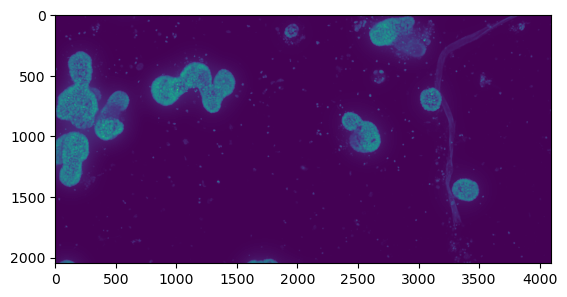

In [19]:
plt.imshow(c5_f0_res0[0])

In [20]:
c5_f0.info

Name,/C/5/0
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.FSStore
No. members,3
No. arrays,3
No. groups,0
Arrays,"0, 1, 2"


In [21]:
dapi_histogram = UIntHistogram.load(join(c5_f0.store.dir_path(), 
                                         c5_f0.path, 
                                         c5_f0.attrs.asdict()['histograms']['DAPI']))

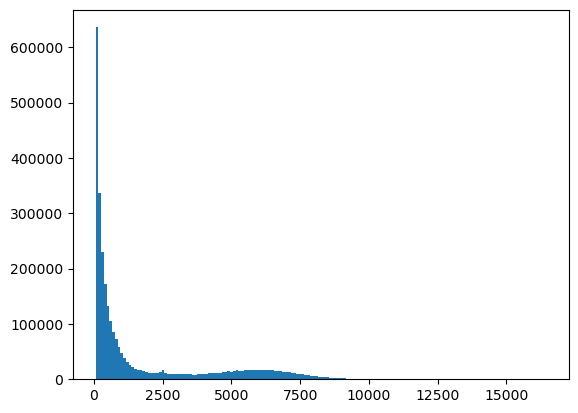

In [22]:
dapi_histogram.plot(width=100)

In [23]:
print(dapi_histogram.min())
print(dapi_histogram.mean())
print(dapi_histogram.max())
print(dapi_histogram.std())
print(dapi_histogram.quantile(0.5))

107
746.8684959411621
16454
1628.5330680038232
147


In [24]:
fitc_histogram = UIntHistogram.load(join(c5_f0.store.dir_path(), 
                                         c5_f0.path, 
                                         c5_f0.attrs.asdict()['histograms']['FITC']))

In [25]:
joint_hist = UIntHistogram()

In [26]:
joint_hist.combine(dapi_histogram)
joint_hist.combine(fitc_histogram)

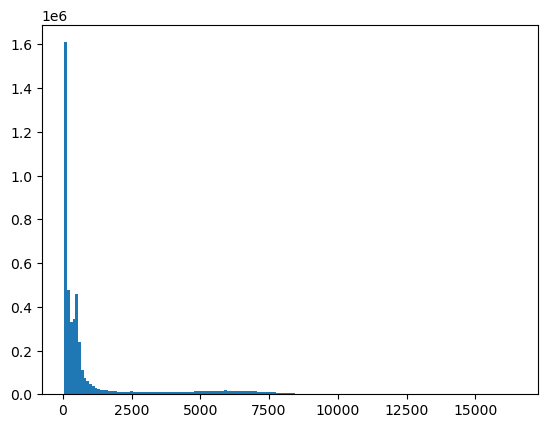

In [27]:
joint_hist.plot(width=100)